In [47]:
from pynq import Overlay
import numpy as np
from pynq import allocate
from pynq.lib import dma
from scipy.linalg import dft
import matplotlib.pyplot as plt
import time
from IPython.display import Audio
from pynq import Clocks
import threading
import queue
import struct
import pyaudio
import array
from sys import stdout, stderr

In [48]:
re = np.loadtxt('input.real.dat')
im = np.loadtxt('input.imag.dat')
exp_out = np.loadtxt('output.dat')

In [49]:
ol=Overlay('Project1_design_1.bit')

In [50]:
dma_ro = ol.axi_dma_0
dma_i  = ol.axi_dma_1
len_ip = ol.cp_corr_0

length_in =96000 
length_out = 100

in_data_r = allocate(shape=(length_in,), dtype=np.float32, cacheable=True)
in_data_i = allocate(shape=(length_in,), dtype=np.float32, cacheable=True)
out_hw = allocate(shape=(length_out,), dtype=np.float32, cacheable=True)

tic = time.clock_gettime(1);
x_hw = re.astype(np.float32)
np.copyto(in_data_r, x_hw)

x_hw = im.astype(np.float32)
np.copyto(in_data_i, x_hw)

dma_ro.sendchannel.transfer(in_data_r)
dma_i.sendchannel.transfer(in_data_i)
dma_ro.recvchannel.transfer(out_hw)

len_ip.write(0x00,0x81)

while not dma_ro.recvchannel.idle:
    pass

toc = time.clock_gettime_ns(1);
len_ip.write(0x00,0x00)

in_data_r.flush()
out_hw.flush()

print("Proceesing time: {} seconds".format(toc - tic))
in_data_r.close()
in_data_i.close()
out_hw.close()

Proceesing time: 15470922494596.861 seconds


<ipython-input-52-5dfd16836167>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(out_hw)


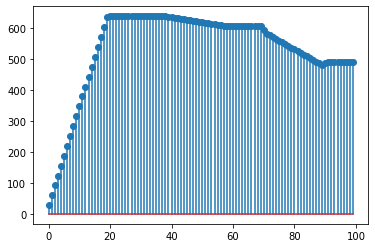

<ipython-input-52-5dfd16836167>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(exp_out)


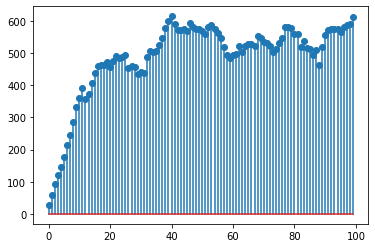

RMSE: 89.5624430607371


In [52]:
""" Calculating and plotting Error"""
%matplotlib inline
xlab = array.array('i',(0 for i in range(0,100)))
diff = exp_out - out_hw
#plt.plot(out_hw)
plt.stem(out_hw)
plt.show()
plt.stem(exp_out)
plt.show()
print("RMSE: {}".format(np.sqrt(np.mean((diff)**2))))